<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [77]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

#### Read the data

Load the csv file and print the first five observations.

In [67]:
df=pd.read_csv('seeds_dataset.csv')
df.head(5)

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.760000,13.380000,5.073000,3.155000,4.830000,0
1,12.130000,13.730000,5.394000,3.745000,5.220000,0
2,14.860000,14.670000,5.678000,3.258000,5.351000,0
3,15.690000,14.750000,5.527000,3.514000,5.046000,0
4,19.940000,16.920000,6.675000,3.763000,6.550000,1


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Consider the train-test split in the ratio 70:30 with random state = 1.

In [68]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Type']),df['Type'],random_state=1,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(139, 5)
(60, 5)
(139,)
(60,)


In [ ]:
df[]

In [69]:
decision_tree=DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred_train=decision_tree.predict(x_train)
y_pred_test=decision_tree.predict(x_test)

In [71]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

# Predication value is uncertain.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        50

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        39
           1       0.81      1.00      0.89        21

    accuracy                           0.92        60
   macro avg       0.90      0.94      0.91        60
weighted avg       0.93      0.92      0.92        60



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot a decision tree for the model in the previous question and identify the seed type of the first observation in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

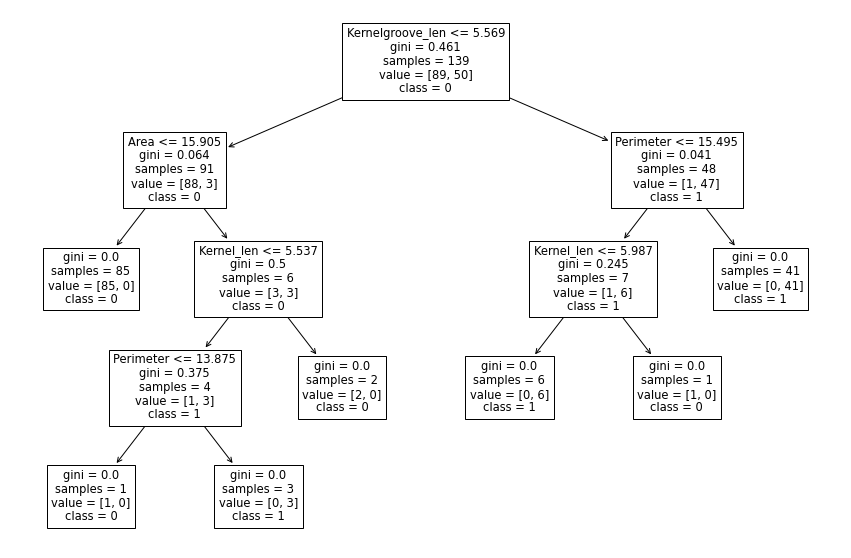

In [72]:
plt.figure(figsize=(15,10))
_=tree.plot_tree(decision_tree,feature_names=x_train.columns,class_names=['0','1'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Select the optimal number for decision trees from the given list of values to build a random forest using entropy criterion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

no_of_trees = [6, 8, 10, 12, 14, 16]

In [73]:
random_tree=RandomForestClassifier(random_state=10)

In [74]:
tuned_par=[{'criterion': ['entropy'],'n_estimators': [10, 30, 50, 70, 90]}]

In [75]:
Grid_model=GridSearchCV(estimator=random_tree,param_grid=tuned_par)
Grid_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy'],
                          'n_estimators': [10, 30, 50, 70, 90]}])

In [76]:
# Optimal no. of trees

Grid_model.best_params_

{'criterion': 'entropy', 'n_estimators': 10}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the most important variable in the random forest build with the optimal number of trees obtained in Q3
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
frd_selection=sfs(estimator=random_tree,k_features='best',forward=True,cv=5)
frd_selection.fit(x_train,y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=10),
                          k_features='best')

In [80]:
frd_selection.k_feature_names_

('Perimeter', 'Kernelgroove_len')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which is the best criterion to build a decision tree for the given dataset?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
decision_tree=DecisionTreeClassifier(random_state=10)

In [39]:
tuned_param=[{'criterion': ['entropy','gini']}]

In [41]:
grid_model=GridSearchCV(estimator=decision_tree,param_grid=tuned_param,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy', 'gini']}])

In [43]:
#Best criterion entropy

grid_model.best_params_

{'criterion': 'entropy'}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a random forest containing ten trees and compute the precision and sensitivity of the model from the confusion matrix 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
random_forest=RandomForestClassifier(random_state=10)
random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [82]:
y_pred_train=random_forest.predict(x_train)
y_pred_test=random_forest.predict(x_test)

In [83]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        50

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.88      1.00      0.93        21

    accuracy                           0.95        60
   macro avg       0.94      0.96      0.95        60
weighted avg       0.96      0.95      0.95        60



<AxesSubplot:>

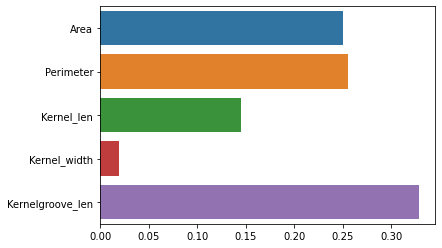

In [84]:
sns.barplot(x=random_forest.feature_importances_,y=x_train.columns)

<AxesSubplot:>

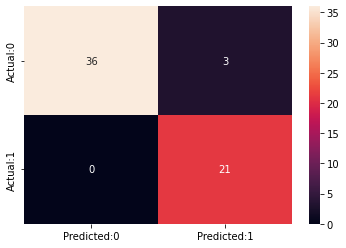

In [49]:
cm=confusion_matrix(y_test,y_pred_test)
matrix=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(data=matrix,annot=True,fmt='d')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the optimal depth of the decision tree from the given list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth_values = [3, 5, 7, 9]

In [52]:
decision_tree=DecisionTreeClassifier(random_state=10)

In [51]:
tuned_par=[{'max_depth':[3, 5, 7, 9]}]

In [53]:
grid_model=GridSearchCV(estimator=decision_tree,param_grid=tuned_par)
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'max_depth': [3, 5, 7, 9]}])

In [55]:
print('Optimal depth :',grid_model.best_params_)

Optimal depth : {'max_depth': 3}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build and plot a decision tree with maximum 5 terminal nodes (use the entropy criterion)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
decision_tree=DecisionTreeClassifier(criterion = 'entropy', random_state = 10,max_leaf_nodes=5)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=10)

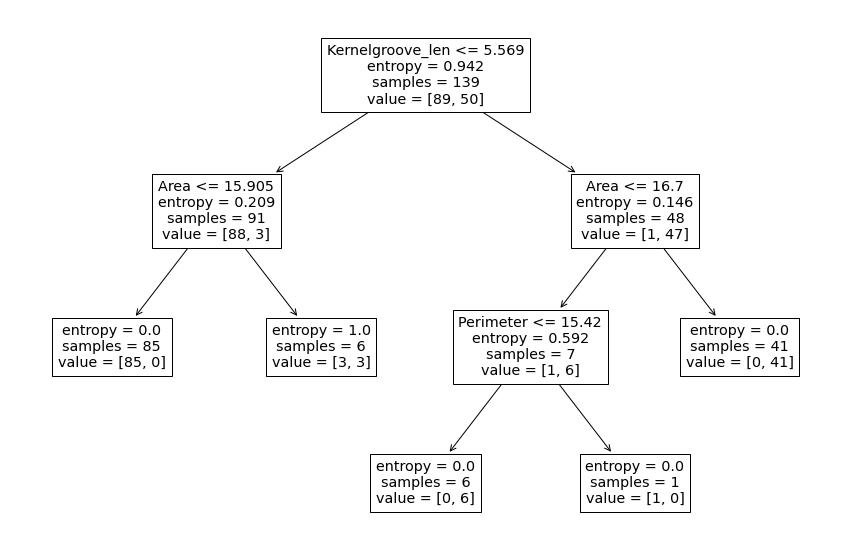

In [58]:
plt.figure(figsize=(15,10))
_=tree.plot_tree(decision_tree,feature_names=x_train.columns)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a random forest with entropy criterion such that each leaf node will contain at least three samples. Also calculate the f-1 score and accuracy of the model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
random_tree=RandomForestClassifier(max_leaf_nodes=4)
random_tree.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=4)

In [60]:
y_pred_train=random_tree.predict(x_train)
y_pred_test=random_tree.predict(x_test)

In [61]:
print(classification_report(y_test,y_pred_test))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.88      1.00      0.93        21

    accuracy                           0.95        60
   macro avg       0.94      0.96      0.95        60
weighted avg       0.96      0.95      0.95        60

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        50

    accuracy                           0.98       139
   macro avg       0.98      0.97      0.98       139
weighted avg       0.98      0.98      0.98       139



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Plot a decision tree with the optimal criterion such that it will contain no more than 4 terminal nodes and each terminal node will contain at least 5 observations  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
decision_tree=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=4)
decision_tree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=4)

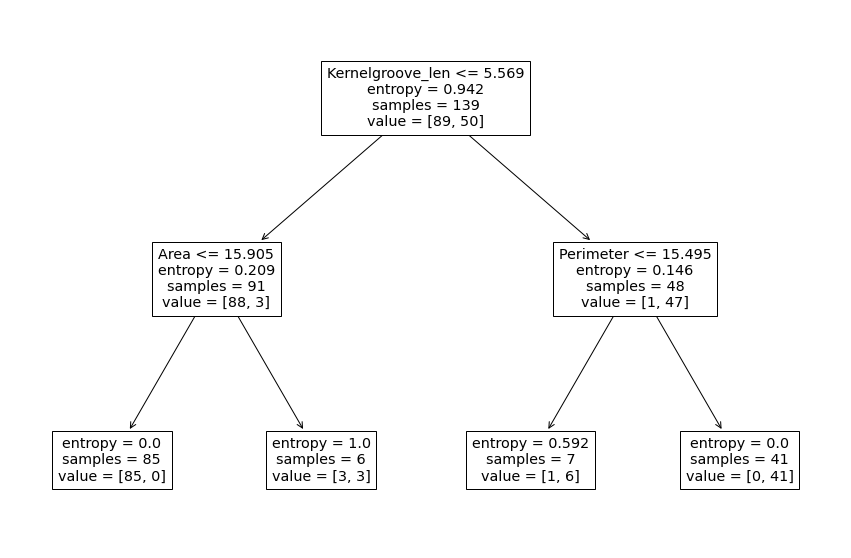

In [87]:
plt.figure(figsize=(15,10))
_=tree.plot_tree(decision_tree,feature_names=x_train.columns)